

##### Análise feita para entender as caracteristicas das casas disponiveis para alugar e facilitar a pesquisa de pessoas que desejam alugar
Fonte: https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv
    
    Pontos para analisar:

+ Contagem de casas por cidade
+ Contagem por número de quartos por casa
+ Contagem de banheiros por casa
+ Analisar os alugueis
    + Comparar preço médio dos alugueis por cidade com a mediana dos alugueis (Entender a influência dos outliers)
+ Analisar as áreas
    + Comparar a área média das casas por cidade com a mediana das áreas (Entender a influência dos outliers)
+ Analisar o preço total
    + Comparar o preço total médio e mediano das casas (Entender a influência dos outliers)
+ Casas que estão mobiliadas e que não estão mobiliadas (em números absolutos e porcentagem)
    + Conferir diferença no preço dos alugueis em casas mobiliadas e não mobiliadas
+ Casas que aceitam e não aceitam animais por cidade (em números absolutos e porcentagem)
    + Conferir se tem diferença no preço dos alugueis em casas que aceitam animais com as que não aceitam



### <b> <center> Importações e Tratamento dos Dados </b>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
casas_df = pd.read_csv('houses_to_rent_v2.csv')
casas_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


### <center> <b> Correlação </b>

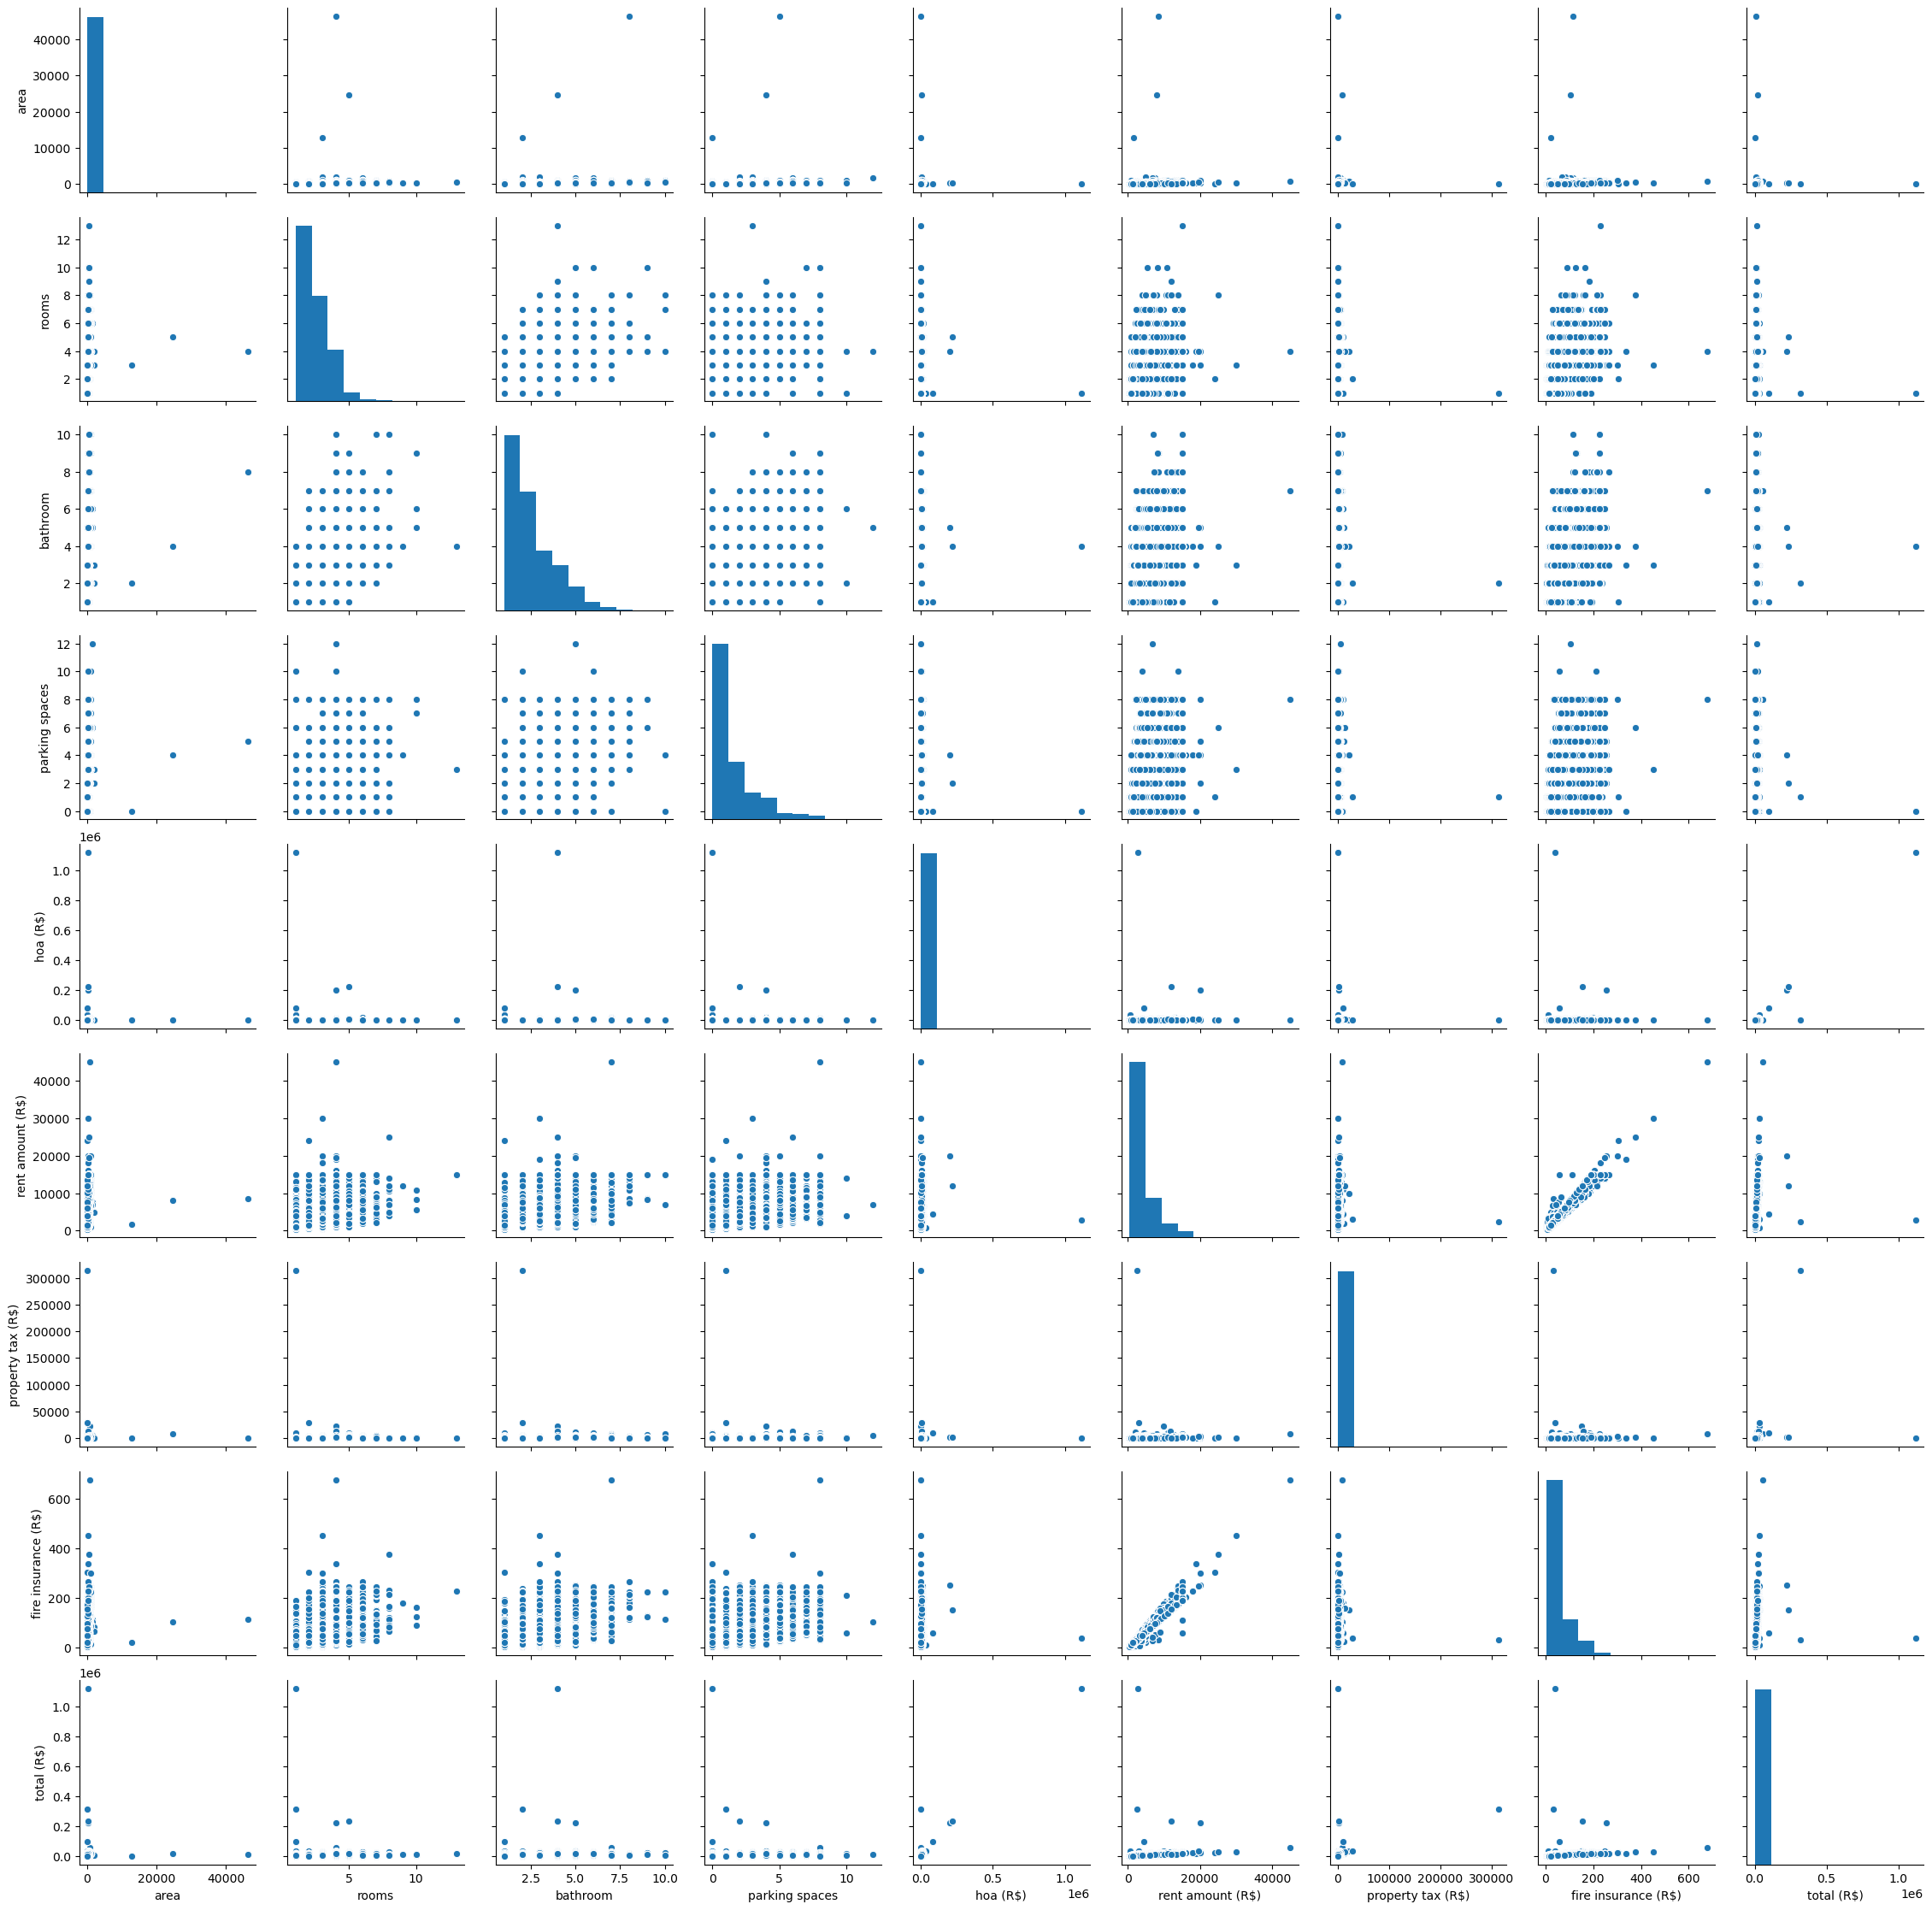

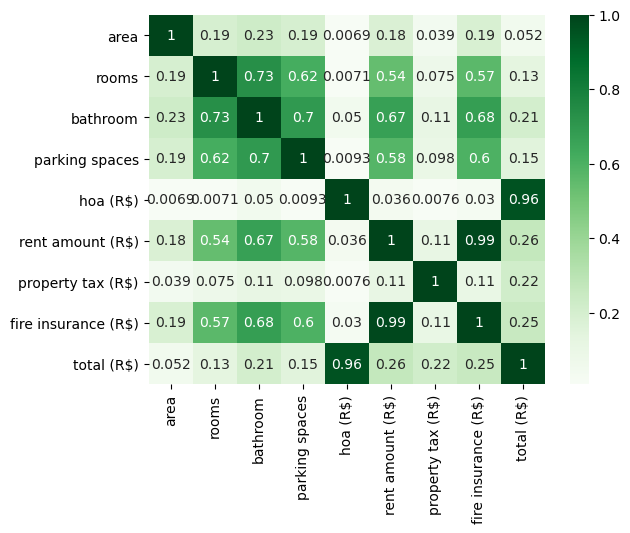

In [150]:
sns.pairplot(casas_df)
plt.show()

sns.heatmap(casas_df.corr(), cmap='Greens', annot=True)
plt.show()


### <center> <b> Contagem de casas por cidade </b>

,city
São Paulo,5887
Rio de Janeiro,1501
Belo Horizonte,1258
Porto Alegre,1193
Campinas,853


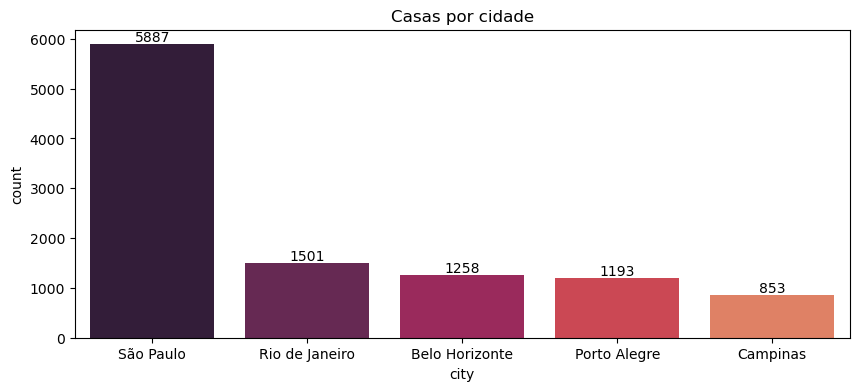

In [45]:
plt.figure(figsize=(10,4))

casas_por_cidade_df = pd.DataFrame(casas_df['city'].value_counts())
display(casas_por_cidade_df)
grafico_casas_por_cidade = sns.countplot(data=casas_df, x='city',  order = casas_df['city'].value_counts().index, palette=sns.color_palette('rocket'))
plt.title('Casas por cidade')

for i in grafico_casas_por_cidade.containers:
   grafico_casas_por_cidade.bar_label(i,)

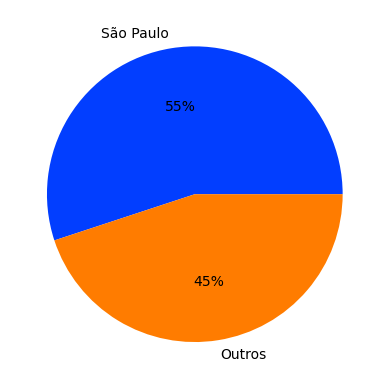

In [72]:
casas_sp = casas_df[(casas_df['city'] == 'São Paulo')]['city'].count()
casas_outras_cid = casas_df['city'].count() - casas_sp

plt.pie(x=[casas_sp, casas_outras_cid], labels= ['São Paulo', 'Outros'], colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.show()


**A maioria das casas estão em São Paulo (55%) e a cidade com menor número de casas é Campinas**

##### <center> <b> Contagem por número de quartos por casa </b>

,rooms
3,3269
2,2975
1,2454
4,1586
5,288
6,68
7,36
8,11
10,3
13,1


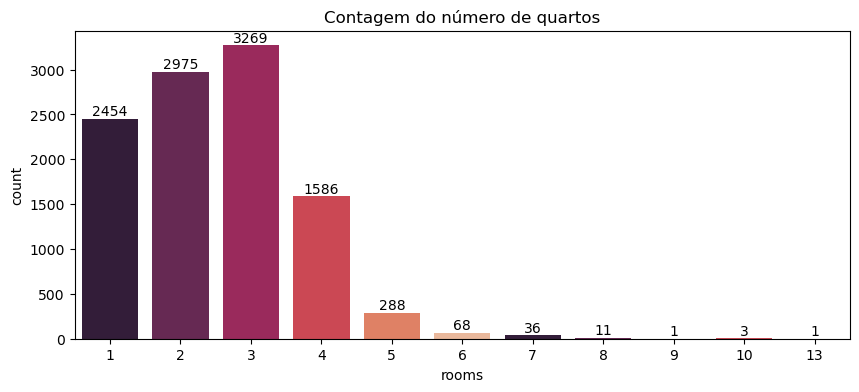

In [71]:
plt.figure(figsize=(10,4))

contagem_quartos_df = pd.DataFrame(casas_df['rooms'].value_counts())
display(contagem_quartos_df)
grafico_contagem_quartos = sns.countplot(data=casas_df, x='rooms', palette=sns.color_palette('rocket'))
plt.title('Contagem do número de quartos')

for i in grafico_contagem_quartos.containers:
   grafico_contagem_quartos.bar_label(i,)



<AxesSubplot:xlabel='rooms'>

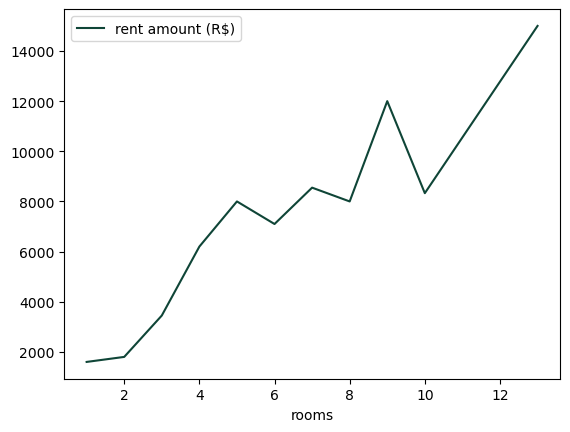

In [85]:
aluguel_quartos = casas_df[['rooms', 'rent amount (R$)']].groupby('rooms').median()
aluguel_quartos.plot.line(color='#0f4537')

Os números de quartos por casa estão concentrados de 1 até 3 quartos, sendo 3 a maioria nas casas. Temos um menor número de casas acima de 4 quartos.

Apesar de não ter uma correlação muito forte, podemos notar que quando a casa tem 3 quartos ou mais, o aluguel aumenta bastante

###  <center> <b> Contagem de banheiros por casa </b>

,bathroom
1,4301
2,2910
3,1474
4,1111
5,578
6,215
7,85
8,11
9,4
10,3


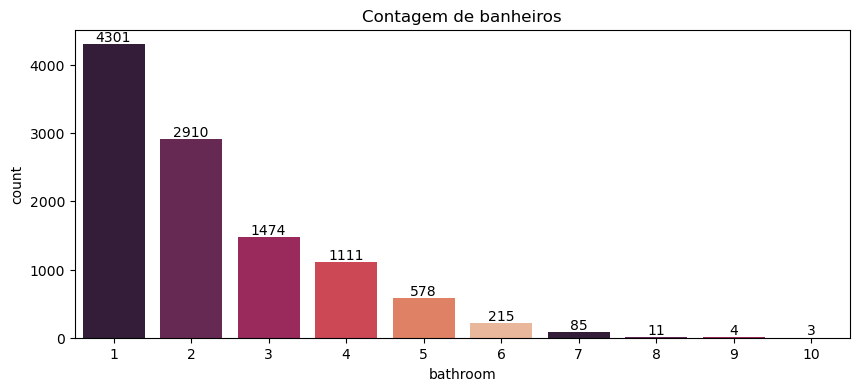

In [143]:
plt.figure(figsize=(10,4))

contagem_banheiros_df = pd.DataFrame(casas_df['bathroom'].value_counts())
display(contagem_banheiros_df)
grafico_contagem_banheiro = sns.countplot(data=casas_df, x='bathroom', palette=sns.color_palette('rocket'))
plt.title('Contagem de banheiros')

for i in grafico_contagem_banheiro.containers:
   grafico_contagem_banheiro.bar_label(i,)

<AxesSubplot:xlabel='bathroom'>

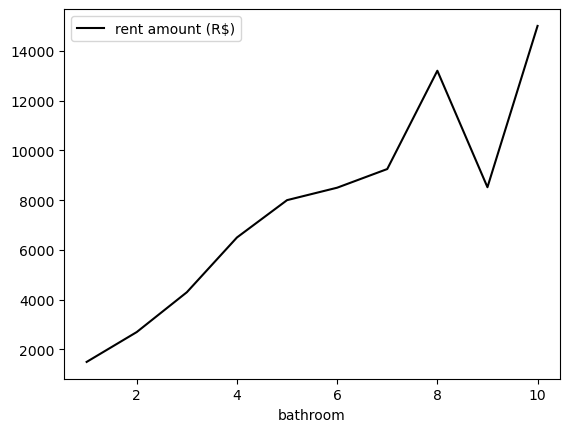

In [152]:
aluguel_banheiros = casas_df[['bathroom', 'rent amount (R$)']].groupby('bathroom').median()
aluguel_banheiros.plot.line(color='black')

A maioria das casas tem 1 banheiro, e menor é o número de casas a medida que o número de banheiros aumenta.

Quanto mais banheiros na casa, maior o aluguel

### <center> <b> Analisar o valor dos alugueis </b>

+ Aluguel geral

In [8]:
media_geral_aluguel = casas_df['rent amount (R$)'].mean()
print(media_geral_aluguel)

mediana_geral_aluguel = casas_df['rent amount (R$)'].median()
print(mediana_geral_aluguel)

3896.247194163861
2661.0


+ Aluguel por cidade

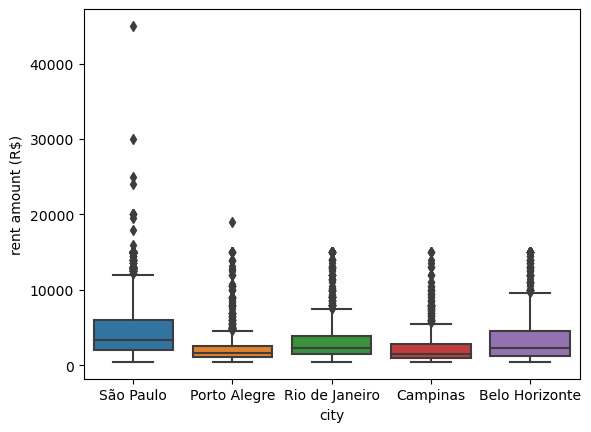

In [9]:
boxplot_cidade = sns.boxplot(data=casas_df, x='city', y='rent amount (R$)')

,rent amount (R$)
city,
Belo Horizonte,3664.127981
Campinas,2364.290739
Porto Alegre,2337.699916
Rio de Janeiro,3232.904064
São Paulo,4652.793783


<Figure size 1000x400 with 0 Axes>

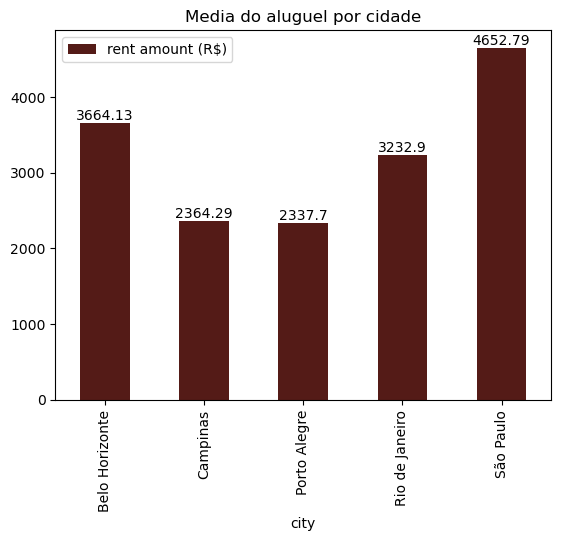

In [103]:
plt.figure(figsize=(10,4))

media_cid_aluguel_df = casas_df[['city', 'rent amount (R$)']].groupby('city').mean()
display(media_cid_aluguel_df)
grafico_media_cid_aluguel = media_cid_aluguel_df.plot.bar(color='#541b17')
plt.title('Media do aluguel por cidade')

for i in grafico_media_cid_aluguel.containers:
   grafico_media_cid_aluguel.bar_label(i,)

,rent amount (R$)
city,
Belo Horizonte,2300.0
Campinas,1500.0
Porto Alegre,1650.0
Rio de Janeiro,2300.0
São Paulo,3400.0


<Figure size 1000x400 with 0 Axes>

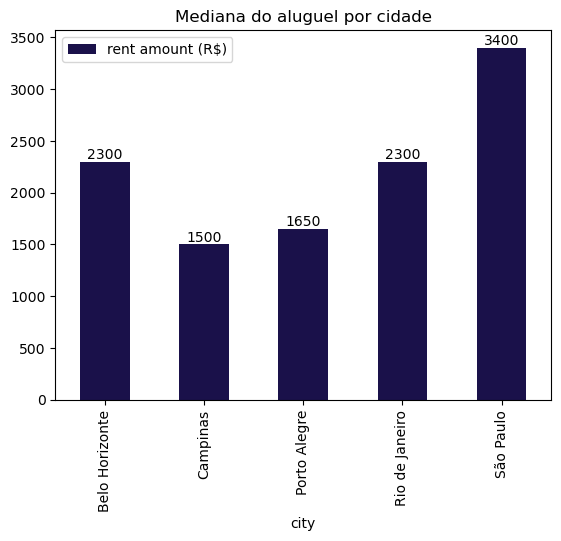

In [11]:
plt.figure(figsize=(10,4))


mediana_cid_aluguel_df = casas_df[['city', 'rent amount (R$)']].groupby('city').median()
display(mediana_cid_aluguel_df)
grafico_mediana_cid_aluguel = mediana_cid_aluguel_df.plot.bar(color='#1a114a')
plt.title('Mediana do aluguel por cidade')

for i in grafico_mediana_cid_aluguel.containers:
   grafico_mediana_cid_aluguel.bar_label(i,)

É possível observar a presença de muitos outliers no valor dos alugues e esses interferem muito no valor da média.

Porto Alegre e Campinas têm os alugueis mais baratos

### <center> <b> Analisar o valor das áreas </b>

+ Área geral

In [12]:
media_area = casas_df['area'].mean()
print(media_area)

mediana_area = casas_df['area'].median()
print(mediana_area)

149.21791994014217
90.0


+ Área por cidade

,area
city,
Belo Horizonte,207.411765
Campinas,137.561547
Porto Alegre,103.609388
Rio de Janeiro,105.347768
São Paulo,158.899439


<Figure size 1000x400 with 0 Axes>

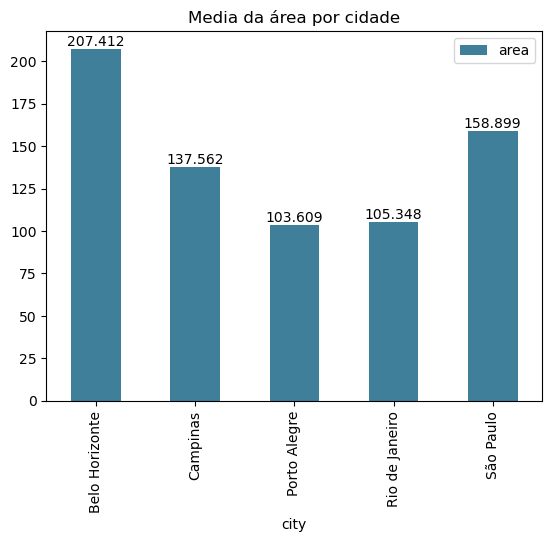

In [13]:
plt.figure(figsize=(10,4))

media_area_cidade_df = casas_df[['city', 'area']].groupby('city').mean()
display(media_area_cidade_df)
grafico_media_area_cid = media_area_cidade_df.plot.bar(color='#3f7f99')
plt.title('Media da área por cidade')

for i in grafico_media_area_cid.containers:
   grafico_media_area_cid.bar_label(i,)

,area
city,
Belo Horizonte,110.0
Campinas,75.0
Porto Alegre,70.0
Rio de Janeiro,80.0
São Paulo,106.0


<Figure size 1000x400 with 0 Axes>

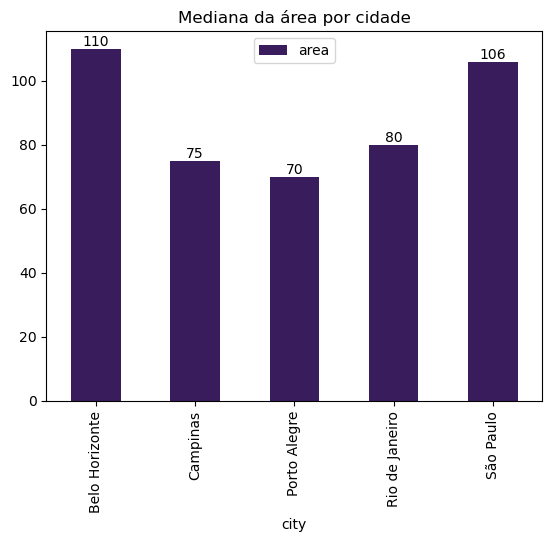

In [14]:
plt.figure(figsize=(10,4))

mediana_area_cidade_df = casas_df[['city', 'area']].groupby('city').median()
display(mediana_area_cidade_df)
grafico_mediana_area_cid = mediana_area_cidade_df.plot.bar(color='#391c5c')
plt.title('Mediana da área por cidade')

for i in grafico_mediana_area_cid.containers:
   grafico_mediana_area_cid.bar_label(i,)

A cidade com maiores áreas de casa, em **média**, é Belo Horizonte; se olharmos a **mediana** das áreas o número cai, mas Belo Horizonte continua a frente

### <center> <b> Preço total por cidade </b>

,total (R$)
city,
Belo Horizonte,6315.242448
Campinas,3173.276671
Porto Alegre,2989.782900
Rio de Janeiro,4611.684877
São Paulo,6380.831833


<Figure size 1000x400 with 0 Axes>

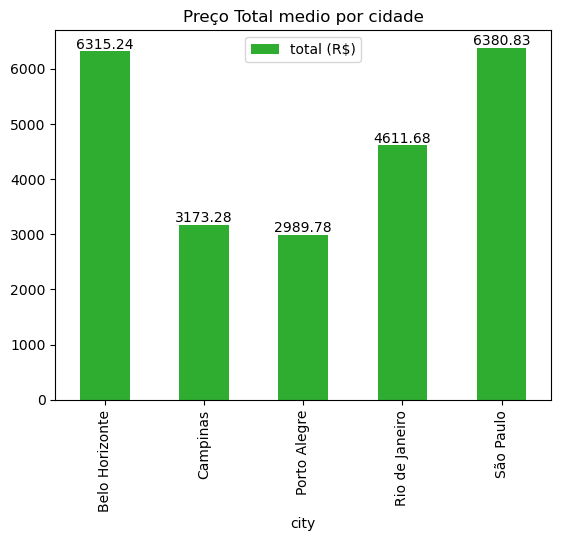

In [15]:
plt.figure(figsize=(10,4))

preco_medio_cidade = casas_df[['city', 'total (R$)']].groupby('city').mean()
display(preco_medio_cidade)
grafico_preco_medio = preco_medio_cidade.plot.bar(color='#2fad31')
plt.title('Preço Total medio por cidade')

for i in grafico_preco_medio.containers:
   grafico_preco_medio.bar_label(i,)

,total (R$)
city,
Belo Horizonte,3040.0
Campinas,2140.0
Porto Alegre,2211.0
Rio de Janeiro,3253.0
São Paulo,4596.0


<Figure size 1000x400 with 0 Axes>

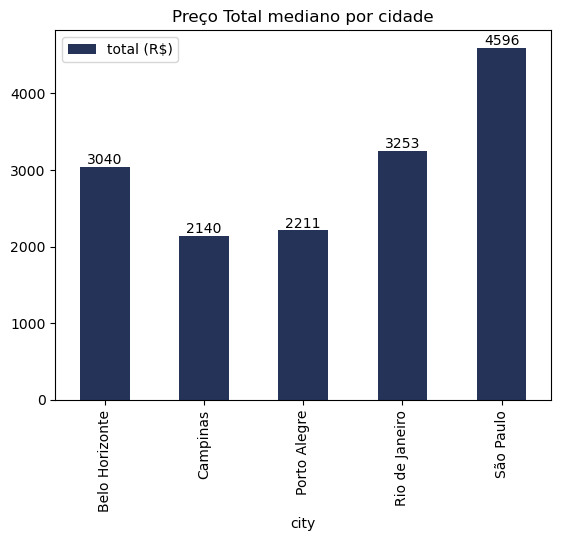

In [16]:
plt.figure(figsize=(10,4))

preco_mediano_cidade = casas_df[['city', 'total (R$)']].groupby('city').median()
display(preco_mediano_cidade)
grafico_preco_mediano = preco_mediano_cidade .plot.bar(color='#253359')
plt.title('Preço Total mediano por cidade')

for i in grafico_preco_mediano.containers:
   grafico_preco_mediano.bar_label(i,)

São Paulo é a cidade que tem a maior mediana do total de gastos. Isso pode estar relacionado ao fato de São Paulo ser a maior cidade da América Latina, consequentemente tendo uma grande demanda.

### <center> <b> Casas que estão mobiliadas e que não estão mobiliadas por cidade </b>

Contagem
city           furniture              
Belo Horizonte not furnished      1081
               furnished           177
Campinas       not furnished       742
               furnished           111
Porto Alegre   not furnished       874
               furnished           319
Rio de Janeiro not furnished      1095
               furnished           406
São Paulo      not furnished      4294
               furnished          1593

Porcentagem
city           furniture                
Belo Horizonte not furnished      85.93%
               furnished          14.07%
Campinas       not furnished      86.99%
               furnished          13.01%
Porto Alegre   not furnished      73.26%
               furnished          26.74%
Rio de Janeiro not furnished      72.95%
               furnished          27.05%
São Paulo      not furnished      72.94%
               furnished          27.06%

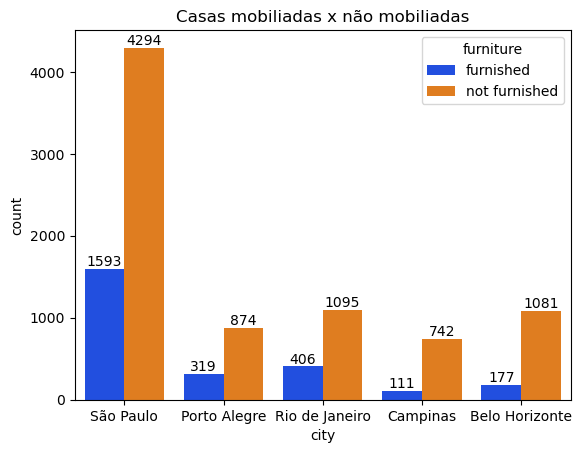

In [100]:
#números absolutos
casas_mobiliadas = casas_df[['furniture', 'city']].groupby('city').value_counts().to_frame()
casas_mobiliadas.rename(columns={0: 'Contagem'}, inplace=True)
display(casas_mobiliadas)

#porcentagem
casas_mobiliadas_por = casas_df[['furniture', 'city']].groupby('city').value_counts(normalize=True).map('{:.2%}'.format).to_frame()
casas_mobiliadas_por.rename(columns={0: 'Porcentagem'}, inplace=True)
display(casas_mobiliadas_por)

grafico_casas_mobiliadas = sns.countplot(data=casas_df, x='city', hue='furniture', palette=sns.color_palette('bright'))
plt.title('Casas mobiliadas x não mobiliadas')

for i in grafico_casas_mobiliadas.containers:
   grafico_casas_mobiliadas.bar_label(i,)

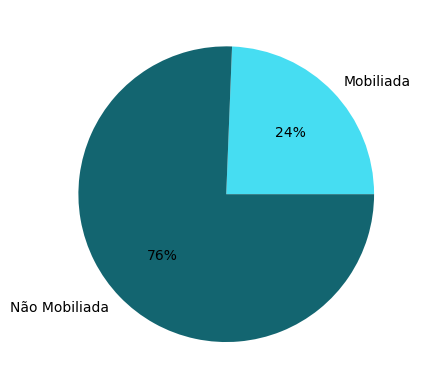

In [156]:
mobiliada = casas_df[(casas_df['furniture'] == 'furnished')]['furniture'].count()
nao_mobiliada = casas_df[(casas_df['furniture'] == 'not furnished')]['furniture'].count()

plt.pie(x=[mobiliada, nao_mobiliada], labels=['Mobiliada', 'Não Mobiliada'], autopct='%.0f%%', colors=['#46ddf2', '#136570'])
plt.show()

**A maioria das casas não estão mobiliadas (76%)**

+ Aluguel Casas mobiliadas x Casas não mobiliadas

,rent amount (R$)
furniture,
furnished,3500.0
not furnished,2400.0


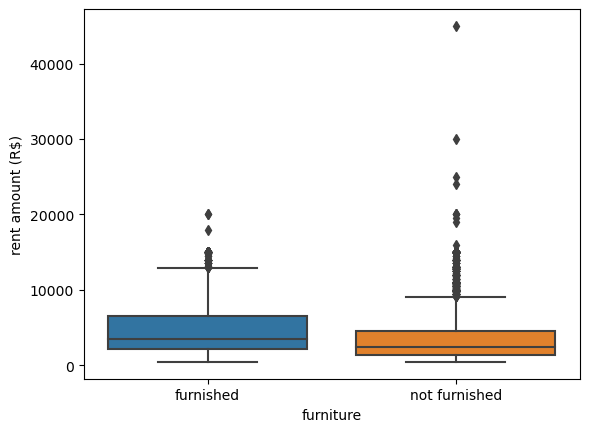

In [18]:
aluguel_mobiliada = sns.boxplot(data=casas_df, x='furniture', y='rent amount (R$)')
preco_aluguel = casas_df[['rent amount (R$)', 'furniture']].groupby('furniture').median()
display(preco_aluguel)



**O aluguel das casas mobiliadas é mais caro**

### <center> <b> Casas que aceitam e não aceitam animais por cidade </b>

0
city           animal         
Belo Horizonte acept       931
               not acept   327
Campinas       acept       693
               not acept   160
Porto Alegre   acept      1005
               not acept   188
Rio de Janeiro acept      1205
               not acept   296
São Paulo      acept      4482
               not acept  1405

0
city           animal           
Belo Horizonte acept      74.01%
               not acept  25.99%
Campinas       acept      81.24%
               not acept  18.76%
Porto Alegre   acept      84.24%
               not acept  15.76%
Rio de Janeiro acept      80.28%
               not acept  19.72%
São Paulo      acept      76.13%
               not acept  23.87%

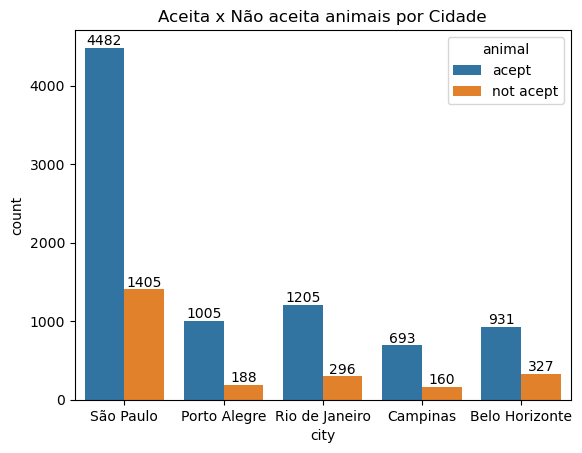

In [19]:
#números absoutos
aceita_animal = casas_df[['city', 'animal']].groupby('city').value_counts().to_frame()
display(aceita_animal)

#porcentagem
aceita_animal_por = casas_df[['city', 'animal']].groupby('city').value_counts(normalize=True).map('{:.2%}'.format).to_frame()
display(aceita_animal_por)

grafico_aceita_animal = sns.countplot(data=casas_df, x='city', hue='animal')
plt.title('Aceita x Não aceita animais por Cidade')

for i in grafico_aceita_animal.containers:
   grafico_aceita_animal.bar_label(i,)

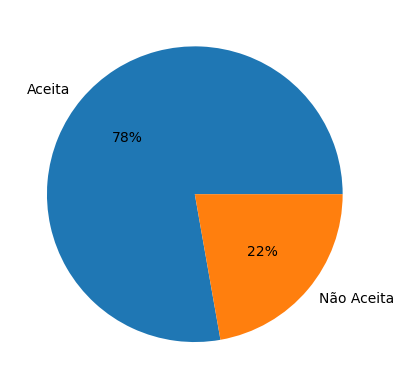

In [121]:
pode_animal = casas_df[(casas_df['animal'] == 'acept')]['animal'].count()
nao_animal = casas_df[(casas_df['animal'] == 'not acept')]['animal'].count()

plt.pie(x=[pode_animal, nao_animal], labels=['Aceita', 'Não Aceita'], autopct='%.0f%%')
plt.show()

+ Aluguel Casas que aceitam e não aceitam animais

,rent amount (R$)
animal,
acept,2791.5
not acept,2385.0


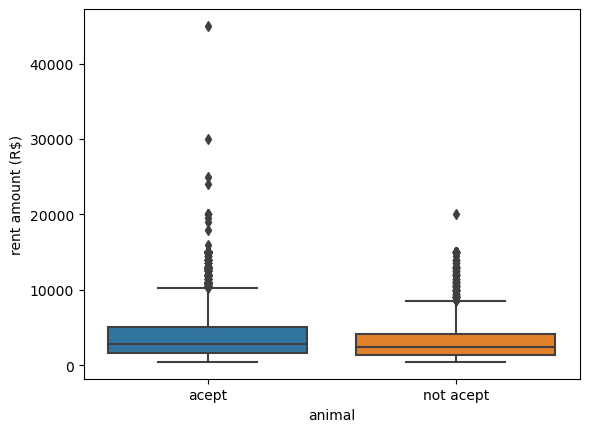

In [20]:
aluguel_animais = sns.boxplot(data=casas_df, x='animal', y='rent amount (R$)')
preco_aluguel = casas_df[['rent amount (R$)', 'animal']].groupby('animal').median()
display(preco_aluguel)

**A maioria das casas permitem animais, mas essas casas tem alugueis mais caros**